In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [21]:
# Utils
DATA_PATH = "../data"

In [45]:
%%time
# Read data
df = pd.read_csv(os.path.join(DATA_PATH, "train.csv"), parse_dates=["datetime"])
df_client = pd.read_csv(os.path.join(DATA_PATH, "client.csv"), parse_dates=["date"])
df_electricity_prices = pd.read_csv(os.path.join(DATA_PATH, "electricity_prices.csv"),
                                    parse_dates=["forecast_date", "origin_date"])
df_gas_prices = pd.read_csv(os.path.join(DATA_PATH, "gas_prices.csv"),
                                    parse_dates=["forecast_date", "origin_date"])

print("TRAIN")
print(df.shape)
display(df.head(2))

print("CLIENT")
print(df_client.shape)
display(df_client.head(2))

print("ELECTRICITY PRICES")
print(df_electricity_prices.shape)
display(df_electricity_prices.head(2))

print("GAS PRICES")
print(df_gas_prices.shape)
display(df_gas_prices.head(2))

TRAIN
(2018352, 9)


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0


CLIENT
(41919, 7)


,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2


ELECTRICITY PRICES
(15286, 4)


,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1


GAS PRICES
(637, 5)


,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2


CPU times: user 666 ms, sys: 51.3 ms, total: 718 ms
Wall time: 717 ms


In [61]:
%%time
# READ weather
df_historical_weather = pd.read_csv(os.path.join(DATA_PATH, "historical_weather.csv"))
df_forecast_weather = pd.read_csv(os.path.join(DATA_PATH, "forecast_weather.csv"))
df_historical_weather["type"] = "historical"
df_forecast_weather["type"] = "forecast"
df_forecast_weather["datetime"] = df_forecast_weather["forecast_datetime"]
del df_forecast_weather["forecast_datetime"]
# concat
df_weather = pd.concat([df_historical_weather, df_forecast_weather])
del df_historical_weather, df_forecast_weather

print("WEATHER")
print(df_weather.shape)
display(df_weather)

WEATHER
(5135312, 25)


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,...,latitude,longitude,data_block_id,type,origin_datetime,hours_ahead,10_metre_u_wind_component,10_metre_v_wind_component,surface_solar_radiation_downwards,total_precipitation
0,2021-09-01 00:00:00,14.400000,12.000000,0.0,0.0,1015.8,4.000000,4.000000,0.000000,0.000000,...,57.6,21.7,1,historical,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-01 00:00:00,14.400000,12.000000,0.0,0.0,1015.8,4.000000,4.000000,0.000000,0.000000,...,57.6,21.7,1,historical,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-01 00:00:00,14.000000,12.000000,0.0,0.0,1010.6,7.000000,8.000000,0.000000,0.000000,...,57.6,22.2,1,historical,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-01 00:00:00,14.400000,12.800000,0.0,0.0,1014.9,6.000000,7.000000,0.000000,0.000000,...,57.6,22.7,1,historical,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-01 00:00:00,14.400000,12.800000,0.0,0.0,1014.9,6.000000,7.000000,0.000000,0.000000,...,57.6,22.7,1,historical,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,2023-06-01 00:00:00+00:00,10.150049,5.662744,NaN,0.0,NaN,0.308594,0.257339,0.004059,0.061066,...,59.7,26.2,637,forecast,2023-05-30 00:00:00+00:00,48.0,6.890626,-3.258144,0.0,0.0
3424508,2023-06-01 00:00:00+00:00,10.259790,5.922754,NaN,0.0,NaN,0.906036,0.895203,0.198700,0.107880,...,59.7,26.7,637,forecast,2023-05-30 00:00:00+00:00,48.0,6.890626,-3.768032,0.0,0.0
3424509,2023-06-01 00:00:00+00:00,10.467798,6.072534,NaN,0.0,NaN,0.530518,0.387466,0.448853,0.000000,...,59.7,27.2,637,forecast,2023-05-30 00:00:00+00:00,48.0,6.214112,-4.700405,0.0,0.0
3424510,2023-06-01 00:00:00+00:00,10.694116,7.009058,NaN,0.0,NaN,0.997498,0.505936,0.997314,0.000000,...,59.7,27.7,637,forecast,2023-05-30 00:00:00+00:00,48.0,5.810060,-4.338345,0.0,0.0


CPU times: user 6.01 s, sys: 949 ms, total: 6.96 s
Wall time: 6.96 s


## EDA

### Train

In [4]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


In [5]:
# check missing values
display(df.isna().sum())

# remove missing target
df = df.dropna(subset=["target"])
assert df.isna().sum().sum() == 0
df.shape

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

(2017824, 9)

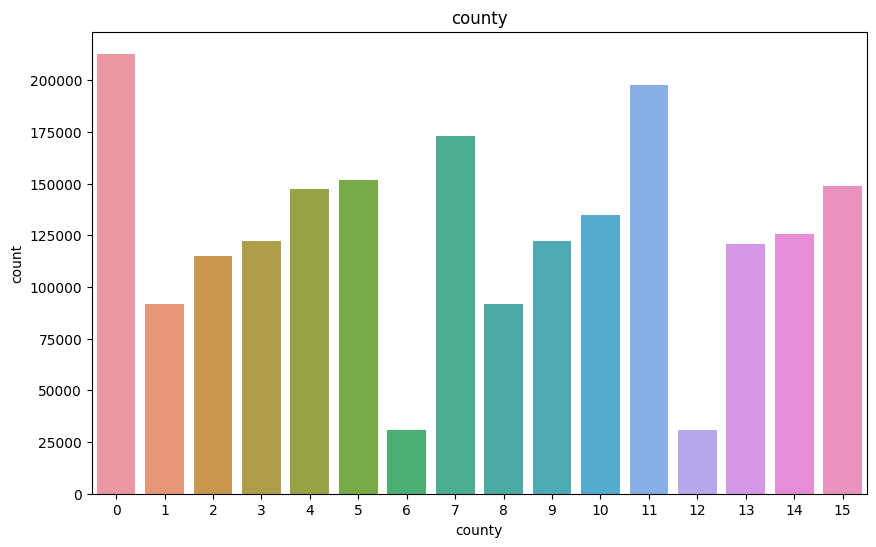

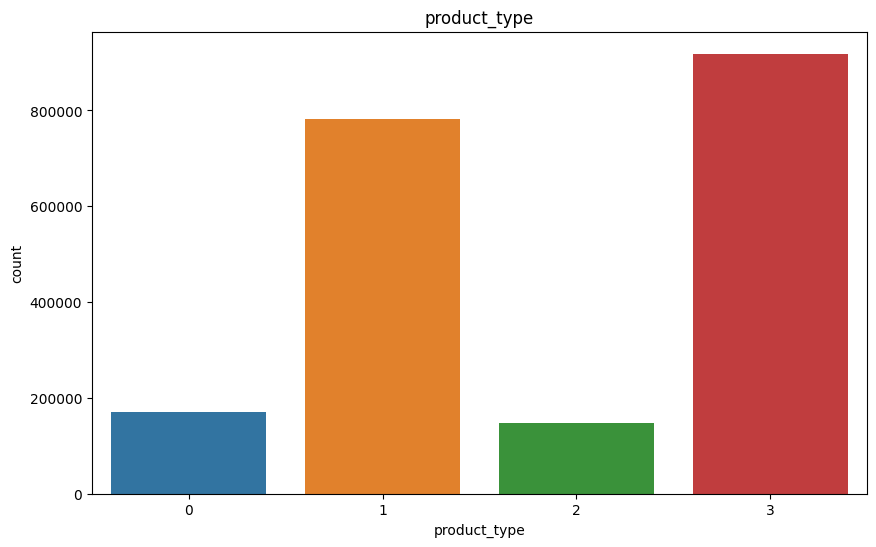

In [6]:
# Countplots
for col in ["county", "product_type"]:
    plt.figure(figsize=(10, 6))
    sns.countplot(df, x=col)
    plt.title(col)
    plt.show()

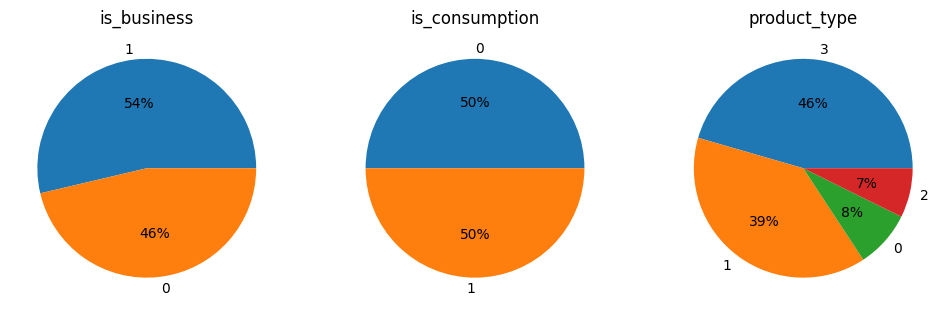

In [20]:
# Diagrams
fig, ax = plt.subplots(1, 3, figsize=(12,8))
for idx, col in enumerate(["is_business", "is_consumption", "product_type"]):
    temp = df[col].value_counts(normalize=True)
    ax[idx].pie(temp, labels=temp.index, autopct='%.0f%%')
    ax[idx].set_title(col)


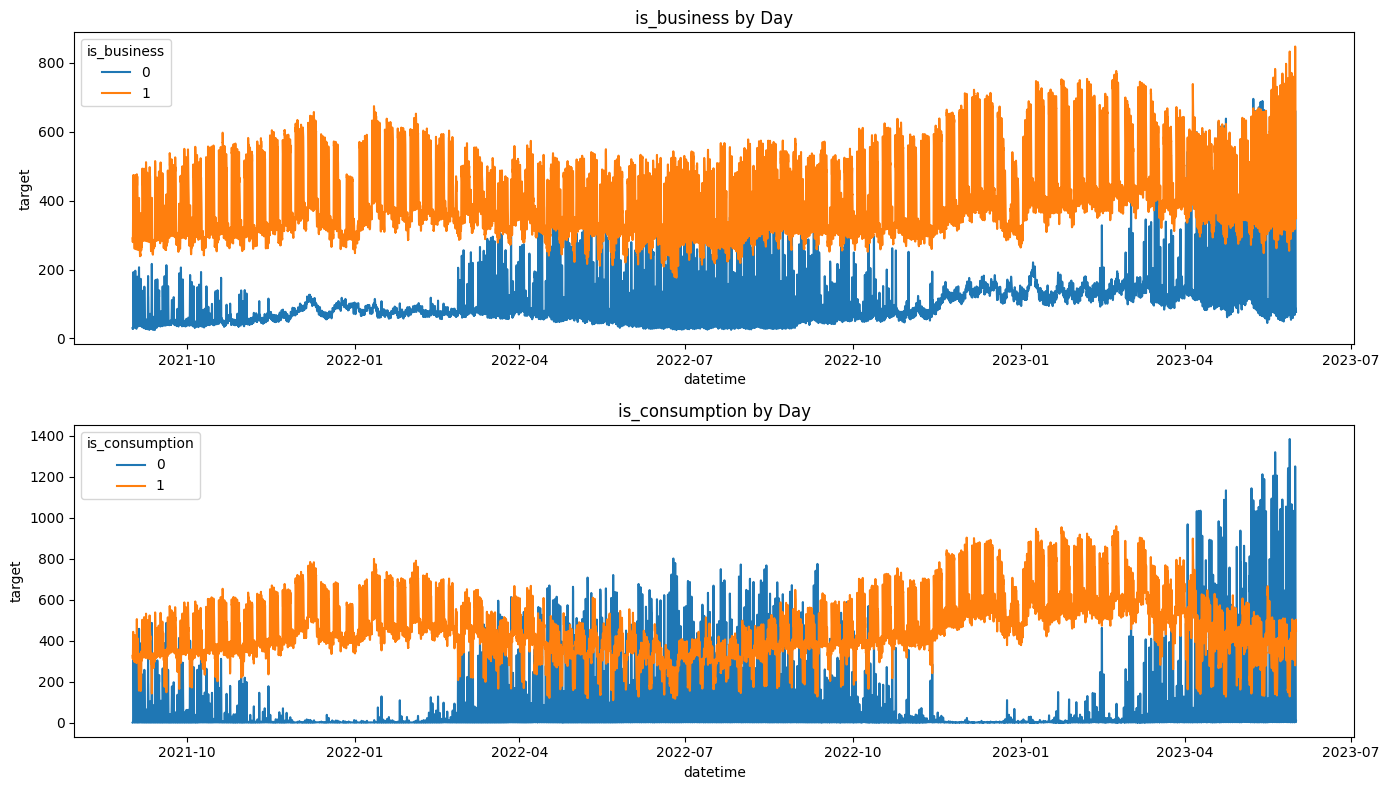

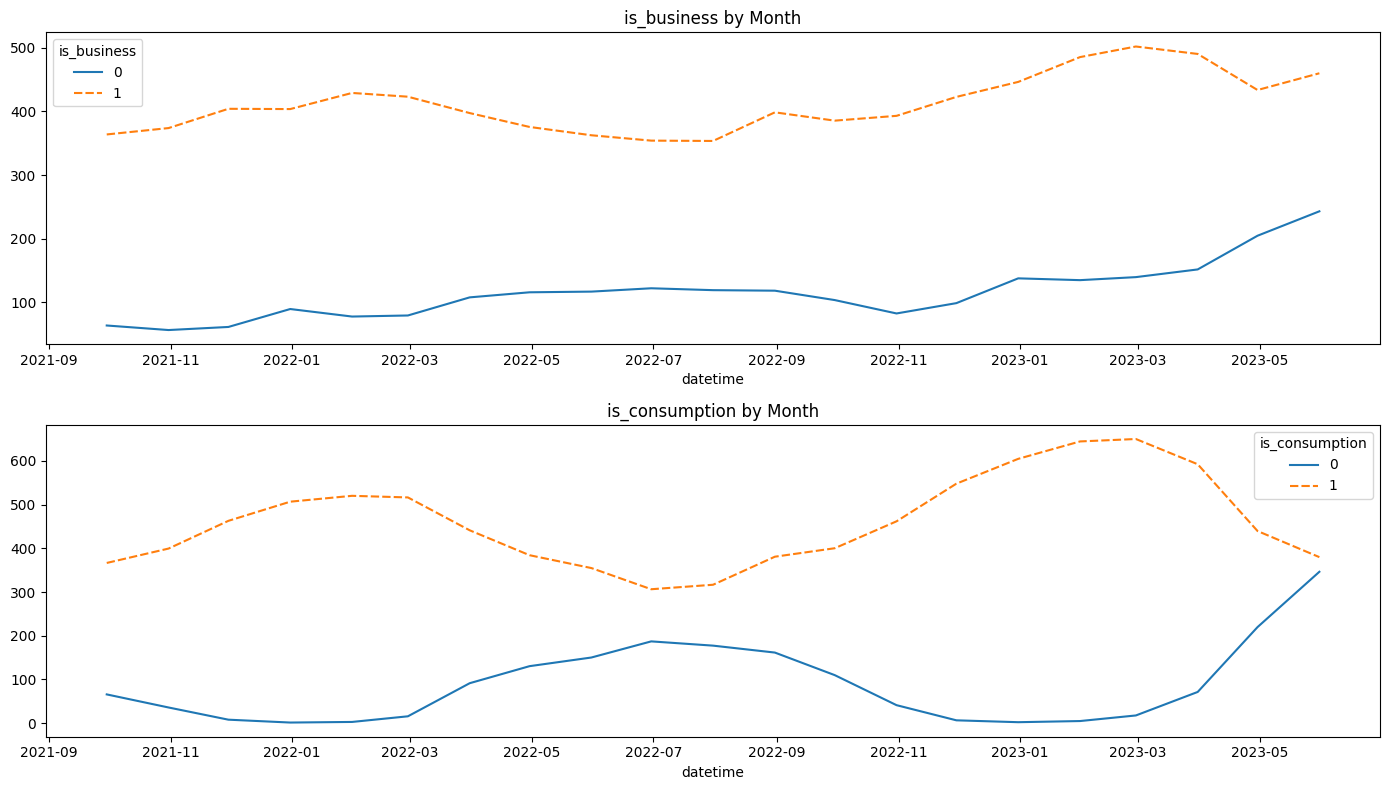

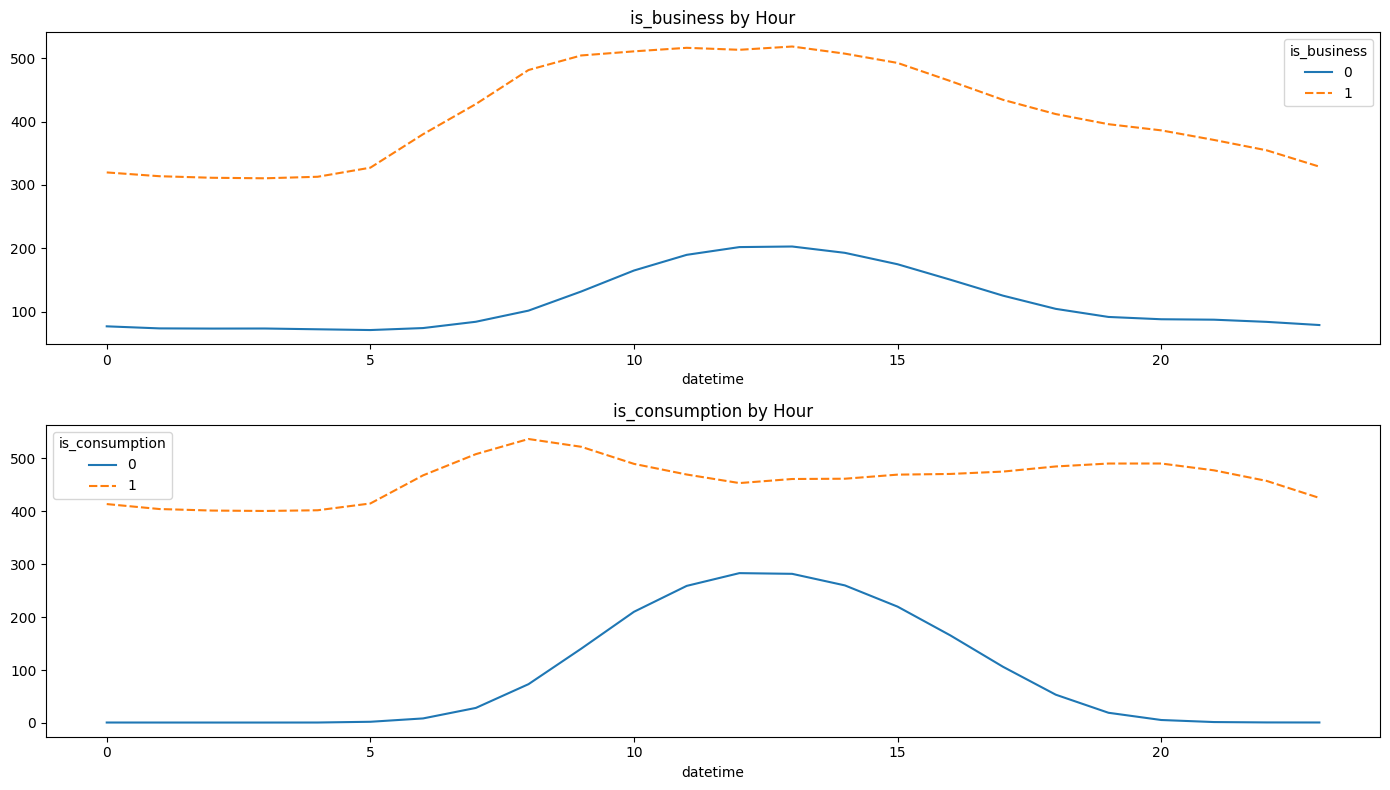

In [169]:
# Check target by columns
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
for idx, col in enumerate(["is_business", "is_consumption"]):
    temp = df.groupby(["datetime", col], as_index=False)["target"].mean()
    sns.lineplot(x="datetime", y="target", hue=col, data=temp, ax=ax[idx])
    ax[idx].set_title(f"{col} by Day")
plt.tight_layout()

fig, ax = plt.subplots(2, 1, figsize=(14, 8))
for idx, col in enumerate(["is_business", "is_consumption"]):
    temp = df.groupby(["datetime", col])["target"].mean().unstack()
    sns.lineplot(temp.resample("M").mean(), ax=ax[idx])
    ax[idx].set_title(f"{col} by Month")
plt.tight_layout()

fig, ax = plt.subplots(2, 1, figsize=(14, 8))
for idx, col in enumerate(["is_business", "is_consumption"]):
    temp = df.groupby(["datetime", col])["target"].mean().unstack()
    sns.lineplot(temp.groupby(temp.index.hour).mean(), ax=ax[idx])
    ax[idx].set_title(f"{col} by Hour")
plt.tight_layout()

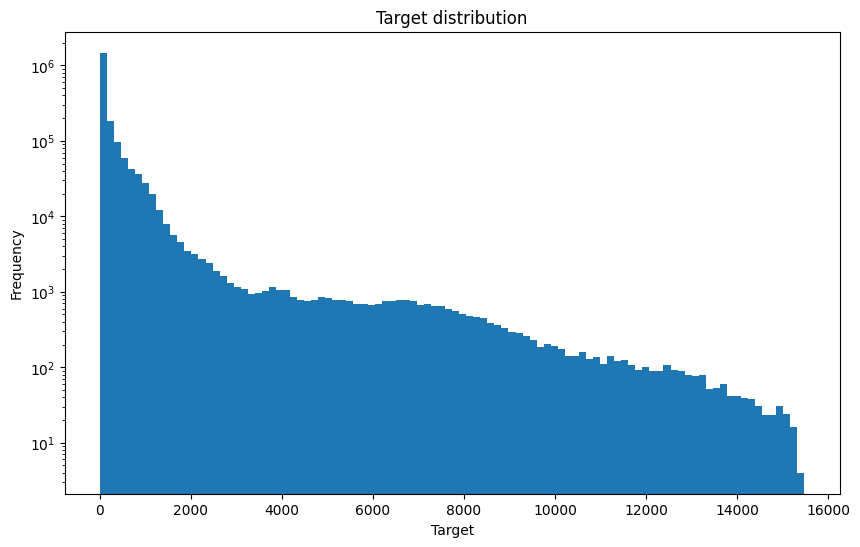

In [13]:
# Target distribution
plt.figure(figsize=(10, 6))
df["target"].plot.hist(bins=100, logy=True, xlabel="Target")
plt.title("Target distribution");

<Axes: >

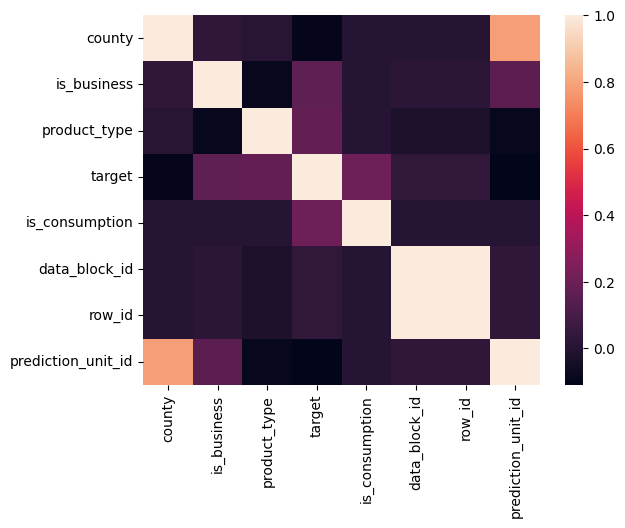

In [90]:
# Correlation
cols_ = df.dtypes[df.dtypes != "datetime64[ns]"].index
sns.heatmap(df[cols_].corr())

### Client

In [31]:
# Data types
display(df_client.dtypes)

# Missing values
display(df_client.isna().sum())

product_type                   int64
county                         int64
eic_count                      int64
installed_capacity           float64
is_business                    int64
date                  datetime64[ns]
data_block_id                  int64
dtype: object

product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

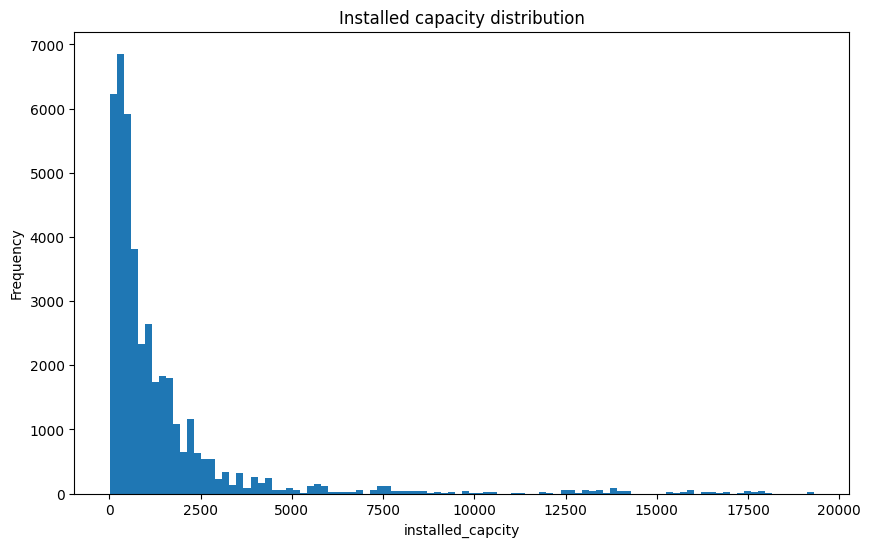

In [37]:
# Check installed_capacity distribution
plt.figure(figsize=(10, 6))
df_client["installed_capacity"].plot.hist(bins=100, logy=False, xlabel="installed_capcity")
plt.title("Installed capacity distribution");

### Electrcicity prices

In [40]:
# Data types
display(df_electricity_prices.dtypes)

# Missing values
display(df_electricity_prices.isna().sum())

forecast_date    datetime64[ns]
euros_per_mwh           float64
origin_date      datetime64[ns]
data_block_id             int64
dtype: object

forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

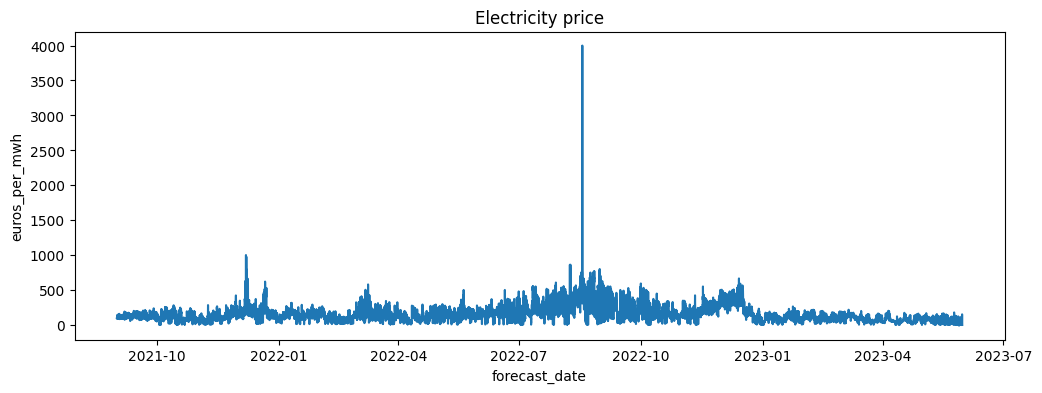

In [43]:
# Viz euros_per_mwh
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_electricity_prices, x="forecast_date", y="euros_per_mwh")
plt.title("Electricity price");

### Gas prices

In [46]:
# Data types
display(df_gas_prices.dtypes)

# Missing values
display(df_gas_prices.isna().sum())

forecast_date            datetime64[ns]
lowest_price_per_mwh            float64
highest_price_per_mwh           float64
origin_date              datetime64[ns]
data_block_id                     int64
dtype: object

forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64

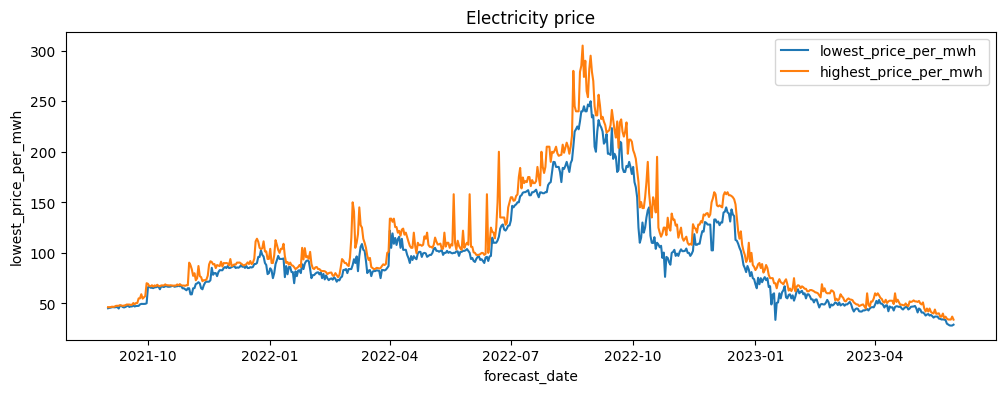

In [48]:
# Viz gas prices
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_gas_prices, x="forecast_date", y="lowest_price_per_mwh", label="lowest_price_per_mwh")
sns.lineplot(data=df_gas_prices, x="forecast_date", y="highest_price_per_mwh", label="highest_price_per_mwh")
plt.title("Electricity price");

### Weather

In [62]:
# Data types
display(df_weather.dtypes)

# Missing values
display(df_weather.isna().sum())

datetime                              object
temperature                          float64
dewpoint                             float64
rain                                 float64
snowfall                             float64
surface_pressure                     float64
cloudcover_total                     float64
cloudcover_low                       float64
cloudcover_mid                       float64
cloudcover_high                      float64
windspeed_10m                        float64
winddirection_10m                    float64
shortwave_radiation                  float64
direct_solar_radiation               float64
diffuse_radiation                    float64
latitude                             float64
longitude                            float64
data_block_id                          int64
type                                  object
origin_datetime                       object
hours_ahead                          float64
10_metre_u_wind_component            float64
10_metre_v

datetime                                   0
temperature                                0
dewpoint                                   0
rain                                 3424512
snowfall                                   0
surface_pressure                     3424512
cloudcover_total                           0
cloudcover_low                             0
cloudcover_mid                             0
cloudcover_high                            0
windspeed_10m                        3424512
winddirection_10m                    3424512
shortwave_radiation                  3424512
direct_solar_radiation                     0
diffuse_radiation                    3424512
latitude                                   0
longitude                                  0
data_block_id                              0
type                                       0
origin_datetime                      1710800
hours_ahead                          1710800
10_metre_u_wind_component            1710800
10_metre_v

Text(0.5, 1.0, 'Locations')

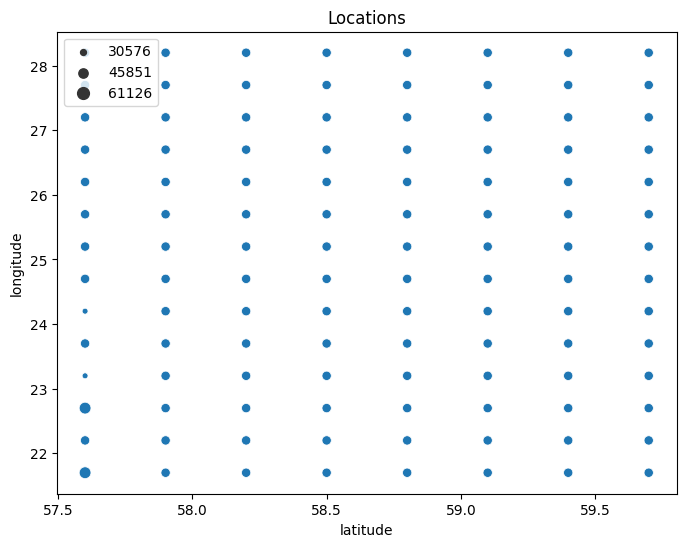

In [76]:
# Plot locations
temp = df_weather.groupby(["latitude", "longitude"]).size().reset_index(name="count")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp, x="latitude", y="longitude", size="count")
plt.legend(loc="upper left")
plt.title("Locations")

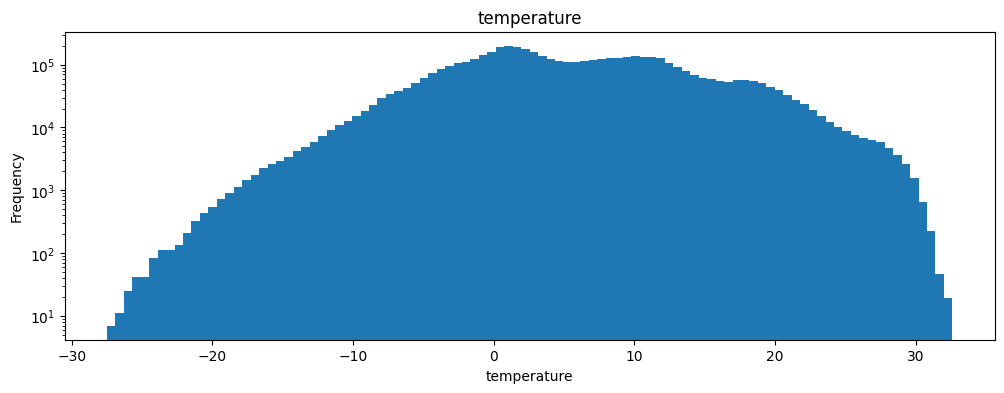

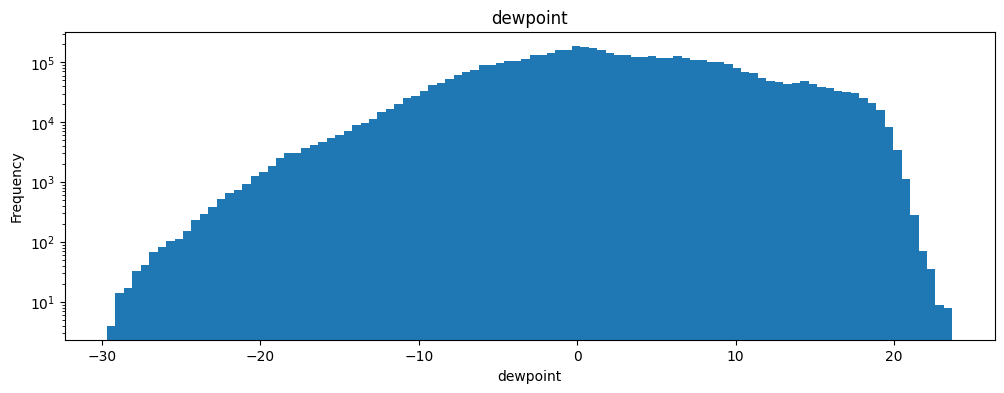

In [79]:
# Viz temperature and dewpoint
for col in ["temperature", "dewpoint"]:
    plt.figure(figsize=(12, 4))
    df_weather[col].plot.hist(bins=100, logy=True, xlabel=col)
    plt.title(col);